In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

To plot coherence l1 norm (l1), relative entropy(S) and success probability(P) as a funciton of number of iteration(noi) taking the Grover's operator as G = DO

O = ( I-2|ψ⟩⟨ψ| ) and D = ( 2|ψ1⟩⟨ψ1|-I )

l1 norm of coherence is given by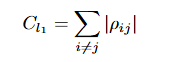

relative entropy is given by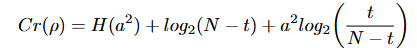 with 

   ;   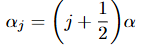   ;   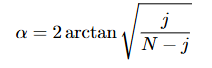   ;   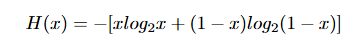   
Success probability is determined by the formula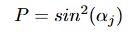
with t = number of target states and j = iteration number

In [9]:
n = 8      #no. of qubits
N = 2**n   #dimension of matrix
t = 2      #no. of target states
length = list(range(n))
noi = 15   #taking same number of iteration for all cases
noi_opt = math.floor(math.sqrt(N/t) * np.pi / 4)   #optimal No of iterations
print("noi = ", noi)
print("Optimal noi = ",noi_opt)

#to set target states by randomly generating them
target = np.zeros(t)    #to store target states
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of while loop
        if(count == t):
            break
print("target = ",target)

phi = [np.pi]    #setting at a particular value
print("phi = ",phi)

x = [complex(np.cos(a), np.sin(a)) for a in phi]
print("x = ",x)

#array to store coherence values after each suboperation in every grover's iteration
l1 = np.zeros(noi)    #to store l1 norm of coherence values after each iteration
S  = np.zeros(noi)    #to store relative entropy values after each iteration
P  = np.zeros(noi)    #to store success probability after each iteration
x_axis = list(range(noi))    #to store iteration number

noi =  15
Optimal noi =  8
target =  [ 25. 161.]
phi =  [3.141592653589793]
x =  [(-1+1.2246467991473532e-16j)]


In [10]:
def iteration(i,a):
    qc.barrier()
    #count = i*2
    copy_i = i    #storing copy of iteration number
    copy_a = a    #storing copy of phi value
    
    #applying O operator
    qc.append(O_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    
    #Applying D operator
    qc.append(D_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied D operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    
    #calculating coherence by l1 norm
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    l1[copy_i] = coherence
    print("l1 norm = ",coherence)
    
    #calculating coherence by relative entropy
    j = copy_i+1   #to store the actual iteration number 
    alpha = 2*np.arctan(np.sqrt(t/(N-t)))
    alpha_j = (j+1/2.0)*alpha    
    a = np.sin(alpha_j)
    a_2 = a**2
    H = -(a_2*math.log2(a_2)+(1-a_2)*math.log2(1-a_2))
    Cr = H+math.log2(N-j)+a_2*math.log2(j/(N-j))
    S[copy_i] = Cr
    print("relative entropy = ",Cr)
    
    #calculating success probability
    P[copy_i] = np.sin(alpha_j)**2
    
for a in range(len(phi)):
    print("======================================== FOR ϕ = ", phi[a]*180/np.pi,"========================================")
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    choice = a
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:    #diagonal elements
                flag = 0
                for k in range(t):
                    if(i == target[k]):
                        O_operator.data[i][j] = x[choice]
                        count += 1
                        flag = 1
                        break
                if(flag == 0):
                    O_operator.data[i][j] = 1            
   
    #defining D operator
    D_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i == j):    #for diagonal elements
                D_operator.data[i][j] = 2*density_operator.data[i][j]-1
            else:          #for off-diagonal elements
                D_operator.data[i][j] = 2*density_operator.data[i][j]
    
    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION--------")
        iteration(i,a)    #a takes angle phi and i takes noi

======================================== FOR ϕ =  180.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  247.0625
l1 norm =  247.0625
relative entropy =  7.80553715533358
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  224.23443603515625
l1 norm =  224.23443603515625
relative entropy =  7.3945631049496
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  189.34702306985855
l1 norm =  189.34702306985855
relative entropy =  6.747938398098569
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  146.72711798540453
l1 norm =  146.72711798540453
relative entropy =  5.921722119908617
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  101.6605879166111
l1 norm =  101.6605879166111
relative entropy =  5.008974041463491
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  59.736738838749986
l1 norm =  59.736738838749986
relative entropy =  4.130135423885546
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  26.155110627307227
l1 norm =  26.155110627307227
relative entropy =  3.425730180803666
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  5.080612250233529
l1 norm =  5.080612250233529
relative entropy =  3.0623228999959133
-------- 9  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  9.032590698857652
l1 norm =  9.032590698857652
relative entropy =  3.323507629354647
-------- 10  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  33.568929572405345
l1 norm =  33.568929572405345
relative entropy =  4.098300239460129
-------- 11  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  69.69291096965232
l1 norm =  69.69291096965232
relative entropy =  5.082732586048986
-------- 12  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  112.92431454147359
l1 norm =  112.92431454147359
relative entropy =  6.083666763666811
-------- 13  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  157.9014330093853
l1 norm =  157.9014330093853
relative entropy =  6.950436127970049
-------- 14  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  199.04604953178875
l1 norm =  199.04604953178875
relative entropy =  7.57894927965902
-------- 15  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  231.2552673323908
l1 norm =  231.2552673323908
relative entropy =  7.92153522823481


l1 =  [0.965087890625, 0.8759157657623291, 0.739636808866635, 0.5731528046304865, 0.39711167154926214, 0.23334663608886713, 0.10216840088791886, 0.019846141602474724, 0.0352835574174127, 0.13112863114220838, 0.27223793347520436, 0.4411106036776312, 0.6168024726929113, 0.7775236309835498, 0.9033408880171515]
S_N =  [0.030490379513021797, 0.028885012128709375, 0.026359134367572534, 0.023131727030893036, 0.01956630484946676, 0.016133341499552915, 0.01338175851876432, 0.011962198828109036, 0.01298245167716659, 0.01600898531039113, 0.019854424164253853, 0.02376432329557348, 0.027150141124883002, 0.029605270623668047, 0.030943496985292227]
P =  [0.06885529 0.18337012 0.33715448 0.5111355  0.68373546 0.83354792
 0.94199261 0.99561987 0.98777864 0.91944143 0.79908365 0.64163249
 0.46661558 0.29573912 0.1501958 ]


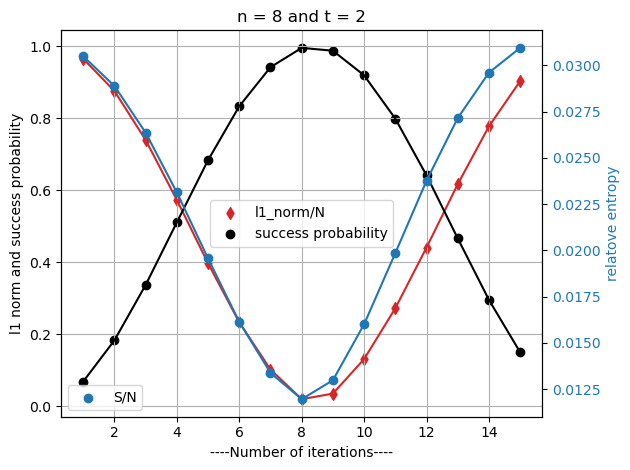

In [11]:
l1_N = [a/N for a in l1]
S_N  = [a/N for a in S]
xa   = [a+1 for a in x_axis]

print("l1 = ",l1_N)
print("S_N = ",S_N)
print("P = ",P)

fig, ax1 = pl.subplots()
pl.title("n = {} and t = {}".format(n, t))
color1 = 'tab:red'
color2 = 'black'
ax1.set_xlabel('----Number of iterations----')
ax1.scatter(xa, l1_N, marker='d', color=color1, label='l1_norm/N')
ax1.plot(xa, l1_N, color=color1)
ax1.scatter(xa, P, color=color2, label='success probability')
ax1.plot(xa, P, color=color2)
pl.legend()
ax1.set_ylabel("l1 norm and success probability")
pl.grid(True)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.scatter(xa, S_N, color=color, label='S/N')
ax2.plot(xa, S_N, color=color)
pl.legend()
ax2.set_ylabel('relatove entropy', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
#pl.grid(True)
pl.show()